In [1]:
%config InlineBackend.figure_formats = ['svg']

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
)

import mglearn

# Working with Text Data

## Example Application: Sentiment Analysis of Movie Reviews

In [3]:
from sklearn.datasets import load_files
reviews_train = load_files("mglearn/data/aclImdb/train/")
# load_files returns a bunch, containing training texts and training labels
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

type of text_train: <class 'list'>
length of text_train: 1000
text_train[1]:
b'I just read the plot summary and it is the worst one I have ever read. It does not do justice to this incredible movie. For an example of a good summary, read the listing at "Turner Classic Movies". Anyway, this was one of my favorite movies as a young child. My sister and I couldn\'t wait until every April when we could see it on T.V. It is one of the best horse movies of it\'s time. It is one of those great classics that the whole family can watch. The romance is clean and endearing. The story line is interesting and the songs are great. They don\'t make movies like this anymore. Good acting and not over the top. Pat Boone and Shirley Jones are at their best, along with many other great character actors.'


In [4]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [5]:
print("Samples per class (training): {}".format(np.bincount(y_train)))

Samples per class (training): [500 500]


In [6]:
reviews_test = load_files("mglearn/data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of documents in test data: 1000
Samples per class (test): [500 500]


## Representing Text Data as a Bag of Words

In [7]:
bards_words = [
    "The fool doth think he is wise,",
    "but the wise man knows himself to be a fool"]

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [9]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))

Vocabulary size: 13
Vocabulary content:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [10]:
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [11]:
print("Dense representation of bag_of_words:\n{}".format(
    bag_of_words.toarray()))

Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [12]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<1000x15535 sparse matrix of type '<class 'numpy.int64'>'
	with 128033 stored elements in Compressed Sparse Row format>


In [13]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 15535
First 20 features:
['00' '000' '0079' '0080' '0083' '00pm' '00s' '01' '06' '08' '10' '100'
 '1000' '10000000000000' '102' '105' '10pm' '10th' '11' '110']
Features 20010 to 20030:
[]
Every 2000th feature:
['00' 'bushranger' 'discussing' 'gone' 'lend' 'patch' 'scary' 'tijuco']


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(max_iter=10000), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.85


In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.85
Best parameters:  {'C': 1}


In [16]:
X_test = vect.transform(text_test)
print("{:.2f}".format(grid.score(X_test, y_test)))

0.81


In [17]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <1000x3584 sparse matrix of type '<class 'numpy.int64'>'
	with 108780 stored elements in Compressed Sparse Row format>


In [18]:
feature_names = vect.get_feature_names_out()
print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['000' '10' '100' '11' '12' '13' '13th' '14' '15' '16' '17' '1920' '1928'
 '1930s' '1945' '1972' '1980' '1983' '1993' '1996' '20' '2000' '2001'
 '2003' '20s' '25' '30' '35' '3d' '3rd' '40' '50' '60' '60s' '70' '70s'
 '75' '80' '80s' '90' '99' 'abiding' 'abilities' 'ability' 'able' 'about'
 'above' 'absence' 'absolute' 'absolutely']
Features 20010 to 20030:
[]
Every 700th feature:
['000' 'conventions' 'graphic' 'myself' 'shadow' 'widow']


In [19]:
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.85


## Stopwords

In [20]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['no', 'found', 'whither', 'get', 'than', 'without', 'due', 'your', 'ten', 'thereupon', 'see', 'wherever', 'thereby', 'amongst', 'my', 'latter', 'de', 'eleven', 'alone', 'out', 'back', 'anywhere', 'though', 'must', 'beyond', 'something', 'well', 'cannot', 'ever', 'whom', 'nevertheless', 'part']


In [21]:
# Specifying stop_words="english" uses the built-in list.
# We could also augment it and pass our own.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<1000x3318 sparse matrix of type '<class 'numpy.int64'>'
	with 62979 stored elements in Compressed Sparse Row format>


In [22]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.86


## Rescaling the Data with tf–idf

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                     LogisticRegression(max_iter=1000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))


Best cross-validation score: 0.87


In [24]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset
X_train = vectorizer.transform(text_train)
# find maximum value for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names_out())
print("Features with lowest tfidf:\n{}".format(
    feature_names[sorted_by_tfidf[:20]]))
print("Features with highest tfidf: \n{}".format(
    feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['able' 'whose' 'involved' 'disappointed' 'familiar' 'saying' 'stand'
 'usually' '20' 'fantastic' 'haven' 'gone' 'setting' 'whether' 'showing'
 'opinion' 'song' 'glad' 'near' 'leading']
Features with highest tfidf: 
['davies' 'kelly' 'she' 'rachel' 'caine' 'earl' 'sean' 'lady' 'disney'
 'al' 'schneebaum' 'cannibal' 'the' 'willie' 'race' 'hepburn' 'europa'
 'luzhin' 'lucy' 'jimmy']


In [25]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
    feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'it' 'is' 'in' 'that' 'but' 'for' 'with'
 'was' 'movie' 'on' 'as' 'not' 'be' 'are' 'have' 'one' 'film' 'you' 'all'
 'at' 'an' 'from' 'so' 'by' 'they' 'who' 'like' 'about' 'if' 'there'
 'just' 'or' 'has' 'his' 'out' 'he' 'some' 'good' 'can' 'what' 'when'
 'more' 'story' 'very' 'only' 'even' 'up' 'would' 'time' 'see' 'no' 'my'
 'her' 'had' 'were' 'me' 'really' 'their' 'which' 'much' 'well' 'than'
 'other' 'made' 'been' 'don' 'also' 'because' 'people' 'do' 'how' 'get'
 'great' 'first' 'into' 'she' 'make' 'will' 'could' 'most' 'movies' 'we'
 'after' 'any' 'watch' 'too' 'way' 'love' 'bad' 'them' 'think' 'acting'
 'life' 'many' 'characters']


## Investigating Model Coefficients

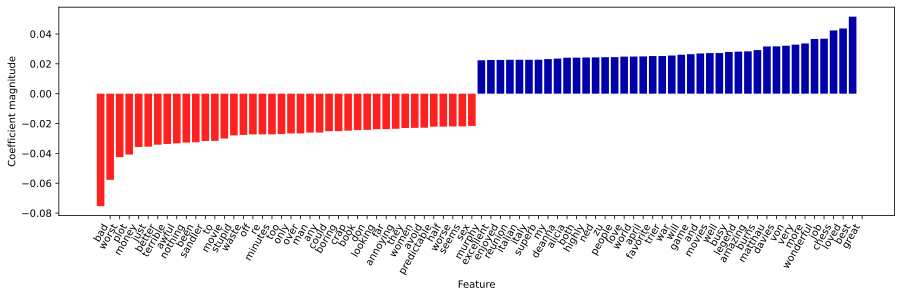

In [26]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names, n_top_features=40)

## Bag-of-Words with More Than One Word (n-Grams)

In [27]:
print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [28]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))

Vocabulary size: 13
Vocabulary:
['be' 'but' 'doth' 'fool' 'he' 'himself' 'is' 'knows' 'man' 'the' 'think'
 'to' 'wise']


In [29]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))

Vocabulary size: 14
Vocabulary:
['be fool' 'but the' 'doth think' 'fool doth' 'he is' 'himself to'
 'is wise' 'knows himself' 'man knows' 'the fool' 'the wise' 'think he'
 'to be' 'wise man']


In [30]:
print("Transformed data (dense):\n{}".format(
    cv.transform(bards_words).toarray()))

Transformed data (dense):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [31]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))

Vocabulary size: 39
Vocabulary:
['be' 'be fool' 'but' 'but the' 'but the wise' 'doth' 'doth think'
 'doth think he' 'fool' 'fool doth' 'fool doth think' 'he' 'he is'
 'he is wise' 'himself' 'himself to' 'himself to be' 'is' 'is wise'
 'knows' 'knows himself' 'knows himself to' 'man' 'man knows'
 'man knows himself' 'the' 'the fool' 'the fool doth' 'the wise'
 'the wise man' 'think' 'think he' 'think he is' 'to' 'to be' 'to be fool'
 'wise' 'wise man' 'wise man knows']


In [32]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
# running the grid search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.88
Best parameters:
{'logisticregression__C': 10, 'tfidfvectorizer__ngram_range': (1, 2)}


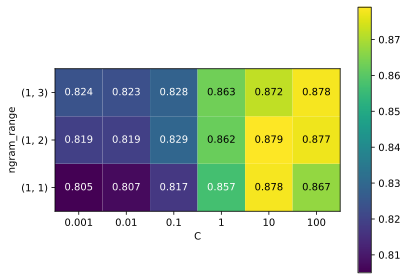

In [33]:
# extract scores from grid_search
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# visualize heat map
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

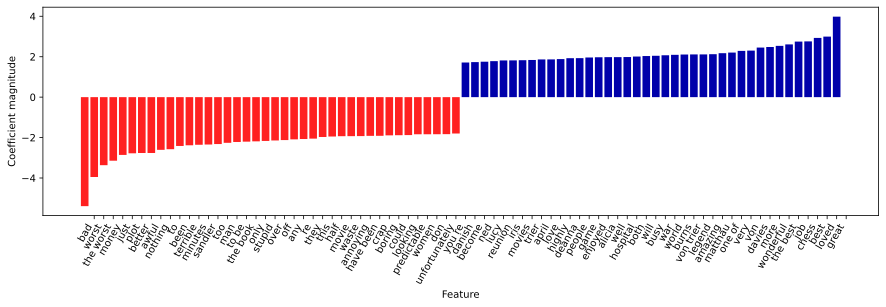

In [34]:
# extract feature names and coefficients
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

In [35]:
# # find 3-gram features
# mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# # visualize only 3-gram features
# mglearn.tools.visualize_coefficients(coef.ravel()[mask],
#                                      feature_names[mask], n_top_features=40)